In [1]:
from ccDGLevels import np, Catacombs, Caves, Point, Rectangle, Line, Circle
from matplotlib import pyplot as plot
import cv2 as cv

In [2]:
plot.rcParams["figure.figsize"] = (12, 9)

In [3]:
?Catacombs

Init signature:
Catacombs(
    w: int,
    h: int,
    rct: int,
    raap: float,
    varix: int,
    variy: int,
    conn: int,
    doShift: bool,
    padx: int = 0,
    pady: int = 0,
    thick: int = 1,
    varih: int = 0,
)
Docstring:      Nethack style dungeon
File:           ~/Desktop/ccDunGen/ccDGLevels.py
Type:           type
Subclasses:     


In [4]:
myCatacombs = Catacombs(160, 48, 7, 0.06, 16, 2, 3, True, 7, 7, 2, 1)
myCatacombs

A 160 wide by 48 tall dungeon,
with 7 rooms of about 06% average area each,
or of average dimension 39 wide by 11 tall,
with an average of 3 hallways out of each room;
Rooms are padded by at least 7 East-West & 7 North-South,
and have a length variance of +/-16 wide and +/- 2 tall.

In [5]:
%%time
myCatacombs.genRooms(True)

[-1  0] (38, 11) (30, 27)
A   38 by   11 Rectangle cornered at (  30,   27).
A   52 by   25 Rectangle cornered at (  23,   20).

[ 3 -1] (42, 10) (65, 2)
A   42 by   10 Rectangle cornered at (  65,    2).
A   56 by   24 Rectangle cornered at (  58,    0).

[-10  -2] (29, 9) (7, 11)
A   29 by    9 Rectangle cornered at (   7,   11).
A   43 by   23 Rectangle cornered at (   0,    4).

[-12   2] (27, 13) (99, 24)
A   27 by   13 Rectangle cornered at (  99,   24).
A   41 by   27 Rectangle cornered at (  92,   17).

[-3 -2] (36, 9) (123, 6)
A   36 by    9 Rectangle cornered at ( 123,    6).
A   50 by   23 Rectangle cornered at ( 116,    0).

[-14   1] (25, 12) (134, 25)
A   25 by   12 Rectangle cornered at ( 134,   25).
A   39 by   26 Rectangle cornered at ( 127,   18).

Your dungeon will only have 6 rooms
Attemped room generations 4975 times.
CPU times: user 6.01 s, sys: 7.83 ms, total: 6.02 s
Wall time: 6.28 s


In [6]:
%%time
myCatacombs.genHalls(True)

CPU times: user 2.14 ms, sys: 6 µs, total: 2.15 ms
Wall time: 2.22 ms


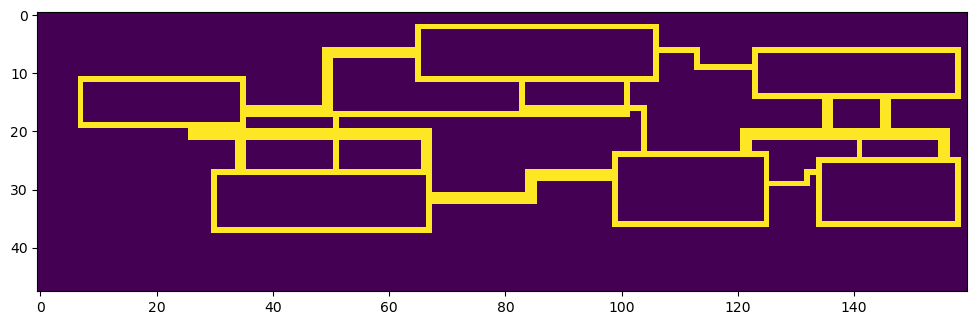

In [7]:
plot.imshow(myCatacombs.draw())
plot.show()

In [8]:
myCatacombs.getImageData()

{'floorRooms': array([[_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        ...,
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _]]),
 'floorHalls': array([[_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        ...,
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _]]),
 'walls': array([[_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        ...,
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _]]),
 'doors': array([[_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        ...,
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _]]),
 'all': array([[_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, _],
        [_, _, _, ..., _, _, 

floorRooms


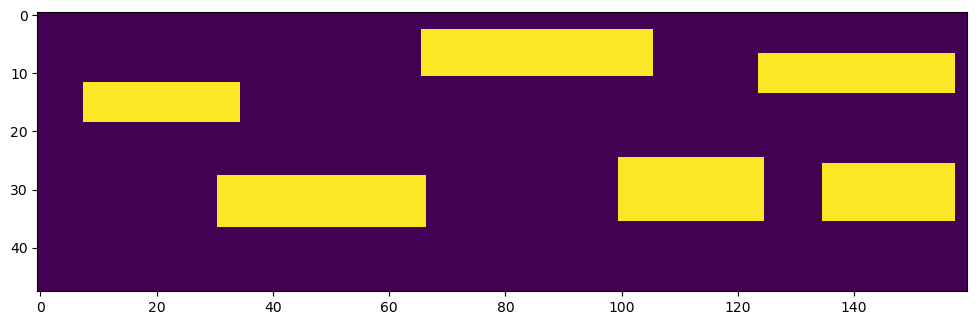

floorHalls


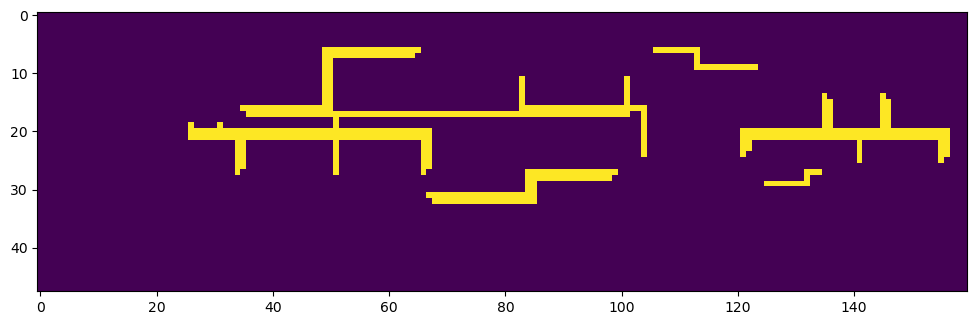

walls


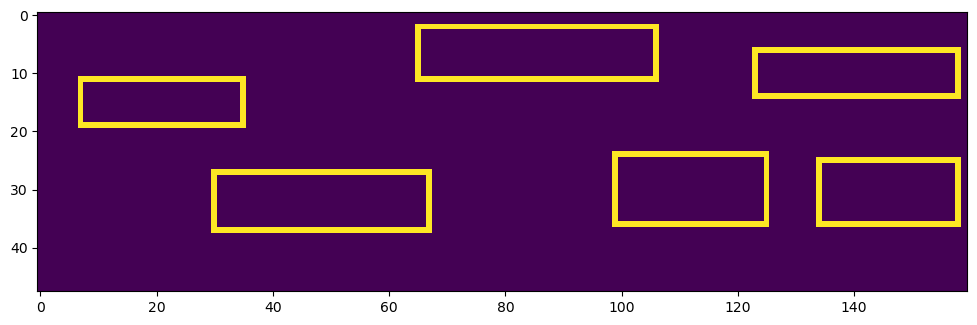

doors


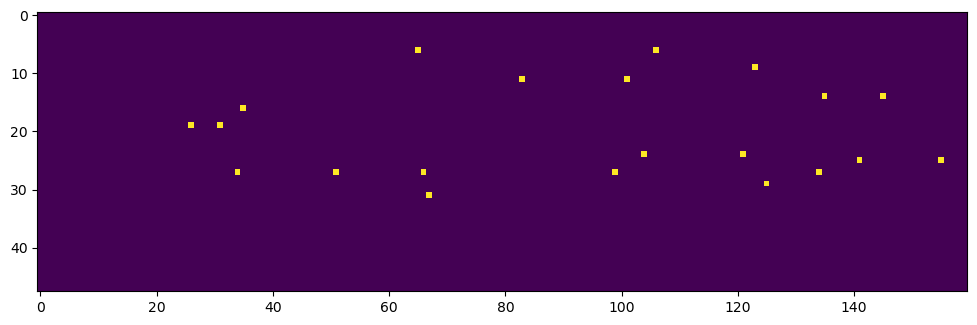

all


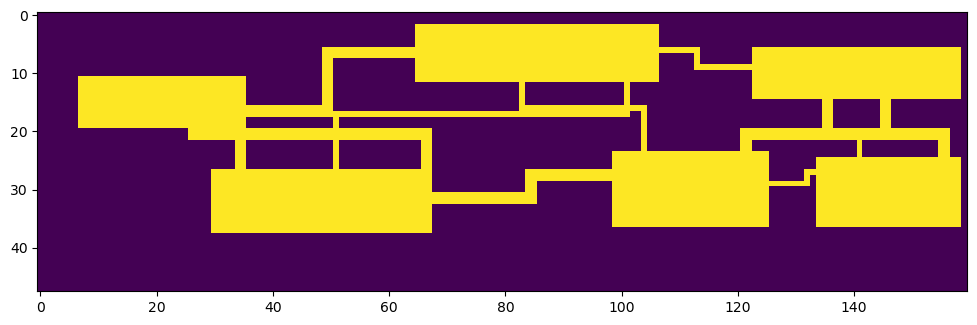

In [9]:
layers = myCatacombs.getImageData()
for k in layers.keys():
    print(k)
    plot.imshow(layers[k])
    plot.show()

In [10]:
imageScale = Point(16, 32)
imageSize = myCatacombs.size * imageScale.npar
imageSize

(2560, 1536)

In [11]:
myCatacombsImage = np.zeros((imageSize.y, imageSize.x, 3), np.uint8)
myCatacombsImage.shape

(1536, 2560, 3)

In [12]:
BROWN = np.array([0x64, 0x40, 0x20], np.uint8)
NAVY = np.array([0x14, 0x28, 0x48], np.uint8)
BLUE = np.array([0x40, 0x80, 0xC0], np.uint8)
CYAN = np.array([0x40, 0xFF, 0xFF], np.uint8)
BLUE, BROWN, CYAN, NAVY

(array([ 64, 128, 192], dtype=uint8),
 array([100,  64,  32], dtype=uint8),
 array([ 64, 255, 255], dtype=uint8),
 array([20, 40, 72], dtype=uint8))

In [13]:
floorsY, floorsX = np.where(layers["floorRooms"])
floorsY *= imageScale.y
floorsX *= imageScale.x
floorsY, floorsX

(array([  96,   96,   96, ..., 1152, 1152, 1152]),
 array([1056, 1072, 1088, ..., 1024, 1040, 1056]))

In [14]:
np.tile(NAVY, 5).reshape(5, -1)

array([[20, 40, 72],
       [20, 40, 72],
       [20, 40, 72],
       [20, 40, 72],
       [20, 40, 72]], dtype=uint8)

In [15]:
np.tile(_, 5).reshape(5, 5, -1)

array([[[20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72]],

       [[20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72]],

       [[20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72]],

       [[20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72]],

       [[20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72],
        [20, 40, 72]]], dtype=uint8)

In [16]:
_.shape

(5, 5, 3)

In [17]:
np.random.randint(-16, 17, (2, 2, 3))

array([[[-15, -14,   5],
        [ 14,  15,  14]],

       [[-13,  -1,   5],
        [  3,  -1,  -3]]])

In [18]:
_ + NAVY

array([[[ 5, 26, 77],
        [34, 55, 86]],

       [[ 7, 39, 77],
        [23, 39, 69]]])

CPU times: user 136 ms, sys: 6.99 ms, total: 143 ms
Wall time: 147 ms


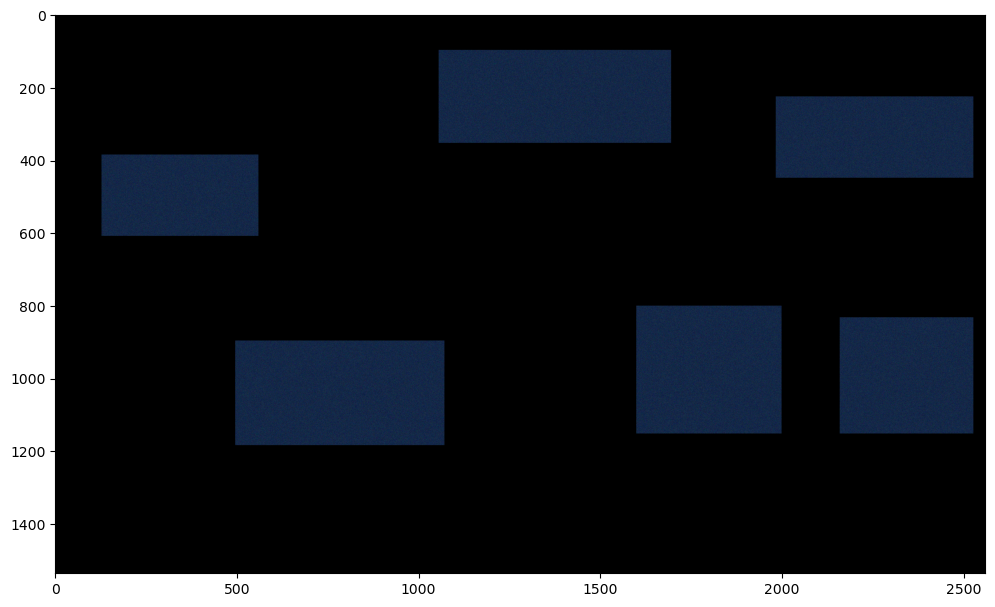

In [19]:
%%time
for i in range(len(floorsY)):
    myCatacombsImage[floorsY[i]:floorsY[i] + imageScale.y, floorsX[i]:floorsX[i] + imageScale.x] = np.random.randint(-16, 17, (imageScale.y, imageScale.x, 3)) + NAVY
plot.imshow(myCatacombsImage)

In [20]:
A = np.arange(4).reshape(2, 2)
A

array([[0, 1],
       [2, 3]])

In [21]:
A.repeat(4, 0)

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [2, 3],
       [2, 3],
       [2, 3],
       [2, 3]])

In [22]:
A.repeat(4, 1)

array([[0, 0, 0, 0, 1, 1, 1, 1],
       [2, 2, 2, 2, 3, 3, 3, 3]])

In [23]:
A.repeat(4, 0).repeat(4, 1)

array([[0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3]])

In [24]:
A.repeat(4, 1).repeat(4, 0)

array([[0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3]])

In [25]:
A.repeat(2, 0).repeat(4, 1)

array([[0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [2, 2, 2, 2, 3, 3, 3, 3],
       [2, 2, 2, 2, 3, 3, 3, 3]])

In [26]:
myCatacombsImage = np.zeros((imageSize.y, imageSize.x, 3), np.uint8)
myCatacombsImage.shape

(1536, 2560, 3)

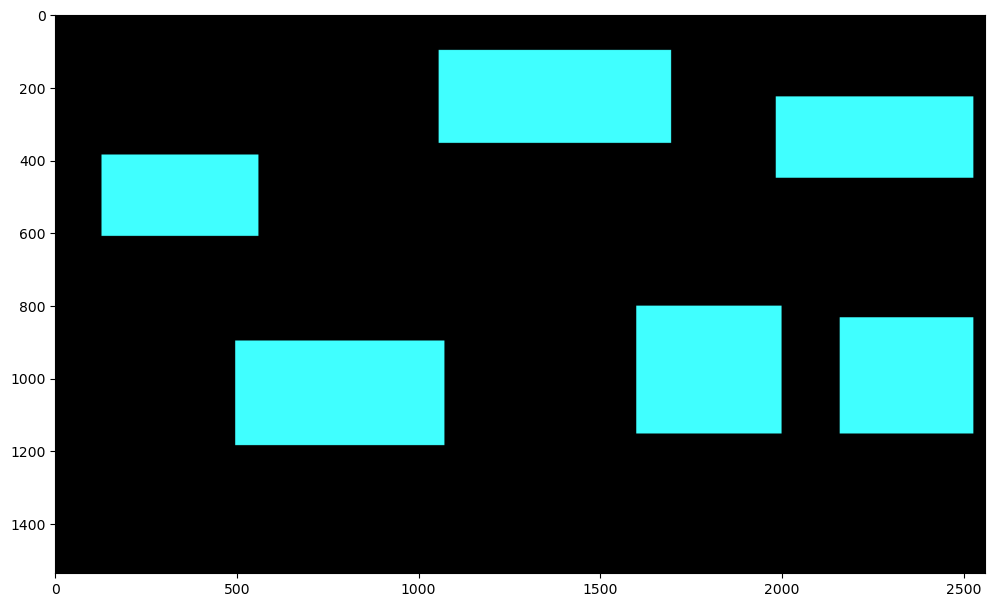

CPU times: user 799 ms, sys: 34.3 ms, total: 833 ms
Wall time: 890 ms


In [27]:
%%time
myCatacombsImage[np.where(layers["floorRooms"].repeat(imageScale.y, 0).repeat(imageScale.x, 1))] = CYAN
plot.imshow(myCatacombsImage)
plot.show()

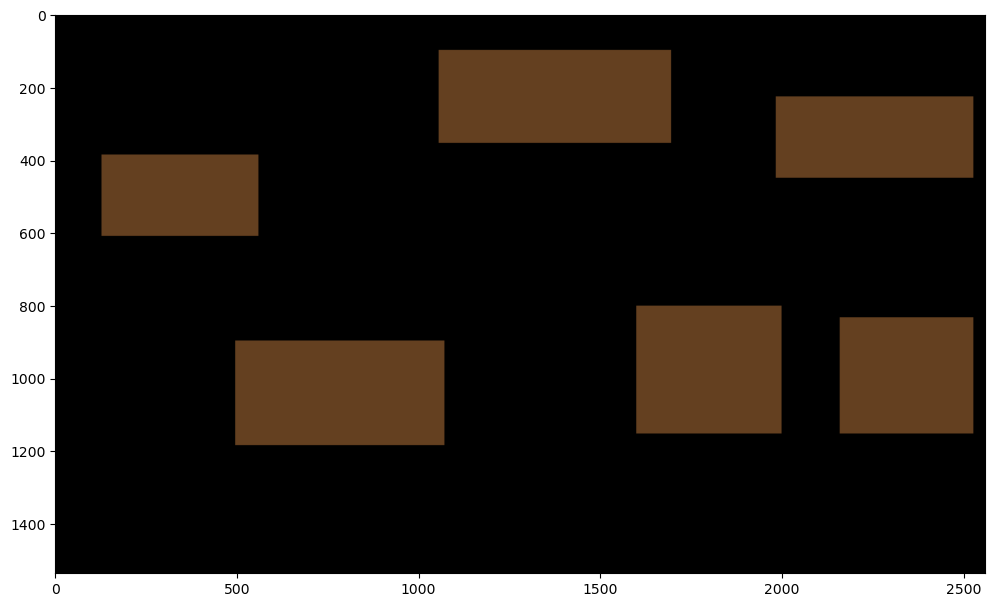

In [28]:
myCatacombsImage[np.where(layers["floorRooms"].repeat(imageScale.y, 0).repeat(imageScale.x, 1))] = BROWN
plot.imshow(myCatacombsImage)
plot.show()

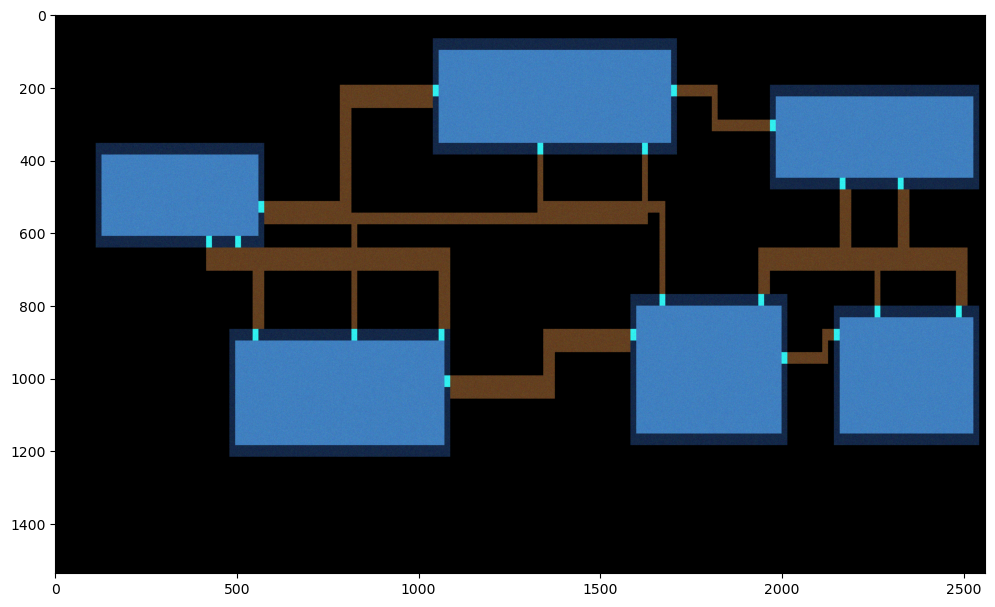

CPU times: user 986 ms, sys: 26.5 ms, total: 1.01 s
Wall time: 1.03 s


In [29]:
%%time
indexHall = np.where(layers["floorHalls"].repeat(imageScale.y, 0).repeat(imageScale.x, 1))
indexFloor = np.where(layers["floorRooms"].repeat(imageScale.y, 0).repeat(imageScale.x, 1))
indexWall = np.where(layers["walls"].repeat(imageScale.y, 0).repeat(imageScale.x, 1))
indexDoor = np.where(layers["doors"].repeat(imageScale.y, 0).repeat(imageScale.x, 1))

myCatacombsImage[indexHall] = np.random.randint(-16, 17, (indexHall[0].shape[0], 3)) + BROWN
myCatacombsImage[indexFloor] = np.random.randint(-16, 17, (indexFloor[0].shape[0], 3)) + BLUE
myCatacombsImage[indexWall] = np.random.randint(-16, 17, (indexWall[0].shape[0], 3)) + NAVY
myCatacombsImage[indexDoor] = np.random.randint(-32, 1, (indexDoor[0].shape[0], 3)) + CYAN

plot.imshow(myCatacombsImage)
plot.show()

In [30]:
[np.where(layers[k].repeat(imageScale.y, 0).repeat(imageScale.x, 1))[0].shape[0] for k in layers.keys()]

[806912, 257024, 254976, 10752, 1308160]

In [31]:
Y, X = np.where(layers["walls"].repeat(16, 0).repeat(16, 1))
Y[:512], X[:512]

(array([32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 

In [32]:
%%time
hallsY, hallsX = np.where(layers["floorHalls"])
floorsY, floorsX = np.where(layers["floorRooms"])
wallsY, wallsX = np.where(layers["walls"])
doorsY, doorsX = np.where(layers["doors"])

hallsY *= imageScale.y
hallsX *= imageScale.x
floorsY *= imageScale.y
floorsX *= imageScale.x
wallsY *= imageScale.y
wallsX *= imageScale.x
doorsY *= imageScale.y
doorsX *= imageScale.x

[len(t) for t in (hallsY, floorsY, wallsY, doorsY)]

CPU times: user 1.12 ms, sys: 894 µs, total: 2.01 ms
Wall time: 1.23 ms


[502, 1576, 498, 21]

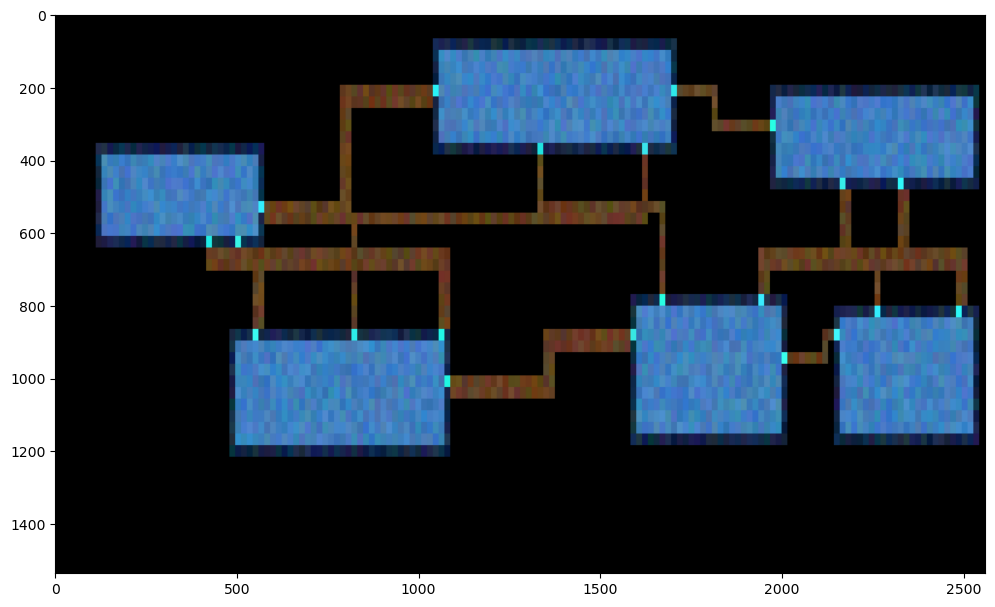

CPU times: user 725 ms, sys: 7.64 ms, total: 733 ms
Wall time: 753 ms


In [33]:
%%time
for i in range(len(hallsY)):
    myCatacombsImage[hallsY[i]:hallsY[i] + imageScale.y, hallsX[i]:hallsX[i] + imageScale.x] = np.random.randint(-16, 17, 3) + BROWN
for i in range(len(floorsY)):
    myCatacombsImage[floorsY[i]:floorsY[i] + imageScale.y, floorsX[i]:floorsX[i] + imageScale.x] = np.random.randint(-16, 17, 3) + BLUE
for i in range(len(wallsY)):
    myCatacombsImage[wallsY[i]:wallsY[i] + imageScale.y, wallsX[i]:wallsX[i] + imageScale.x] = np.random.randint(-16, 17, 3) + NAVY
for i in range(len(doorsY)):
    myCatacombsImage[doorsY[i]:doorsY[i] + imageScale.y, doorsX[i]:doorsX[i] + imageScale.x] = np.random.randint(-32, 1, 3) + CYAN

plot.imshow(myCatacombsImage)
plot.show()

In [34]:
?Caves

Init signature:
Caves(
    w: int,
    h: int,
    rct: int,
    raap: float,
    carvep: float,
    carven: int,
    carveq: int,
    carver: int,
    vari: int,
    conn: int,
    pad: int = 0,
    thick: int = 1,
    varihr: int = 0,
    variha: float = 0.0,
)
Docstring:      Circle-based caves and tunnels
File:           ~/Desktop/ccDunGen/ccDGLevels.py
Type:           type
Subclasses:     


In [35]:
myCave = Caves(80, 24, 3, 0.08, 0.5, 6, 2.5, 2, 3, 2, 7, 3, 1, 30.0)
myCave

A 80 wide by 24 tall cave network,
with 3 chambers of about 08% average area each,
or of average radius 7, with an average of 2 tunnels
out of each chamber; Each chamber is carved 6 times
with a 50% chance of filling in,
with circles of average radius 3 +/- 2;
Rooms are padded by at least 7 radial cells,
and have a radius variance of +/- 3.

In [36]:
%%time
myCave.genRooms(True)
myCave.genCarves(True)

2 9 (59, 13)
A radius    9 circle centered at (59, 13).

-1 6 (37, 10)
A radius    6 circle centered at (37, 10).

1 8 (11, 9)
A radius    8 circle centered at (11, 9).

Attemped room generation 5 times.
Carve Ratio: 0.136418522650196
Generated 6 carves with 67 attempts for room A radius    9 circle centered at (59, 13).
Generated 5 carves with 192 attempts for room A radius    6 circle centered at (37, 10).
Generated 6 carves with 41 attempts for room A radius    8 circle centered at (11, 9).
CPU times: user 731 ms, sys: 6.73 ms, total: 737 ms
Wall time: 786 ms


In [37]:
%%time
myCave.genHalls(True)

Digging tunnels to room A radius    9 circle centered at (59, 13).
Generated a hall from A radius    6 circle centered at (37, 10).
Generated a hall from A radius    8 circle centered at (11, 9).
Digging tunnels to room A radius    6 circle centered at (37, 10).
Generated a hall from A radius    9 circle centered at (59, 13).
Digging tunnels to room A radius    8 circle centered at (11, 9).
Generated a hall from A radius    6 circle centered at (37, 10).
CPU times: user 110 ms, sys: 5.78 ms, total: 116 ms
Wall time: 123 ms


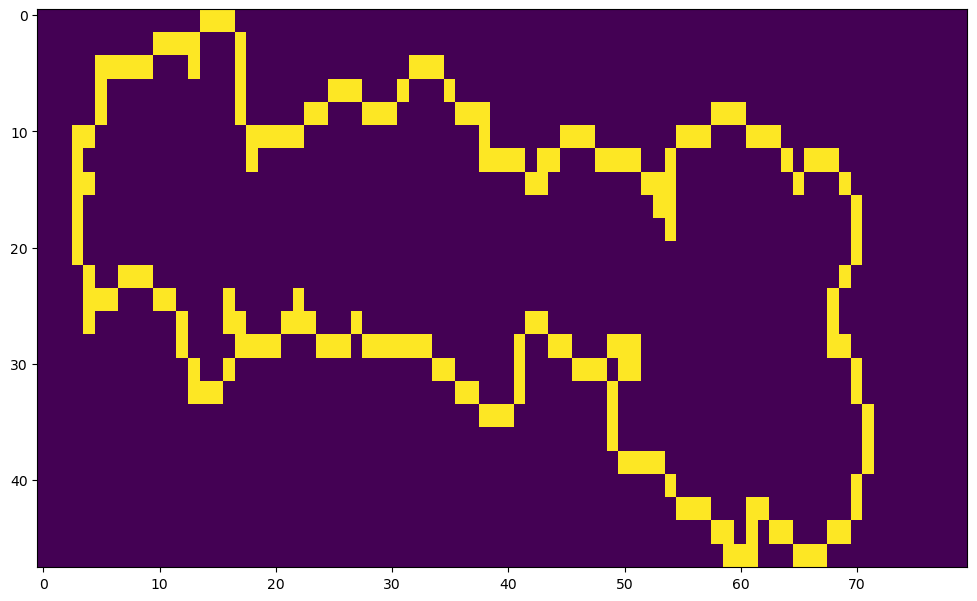

In [40]:
plot.imshow(myCave.draw().repeat(2, 0))
plot.show()

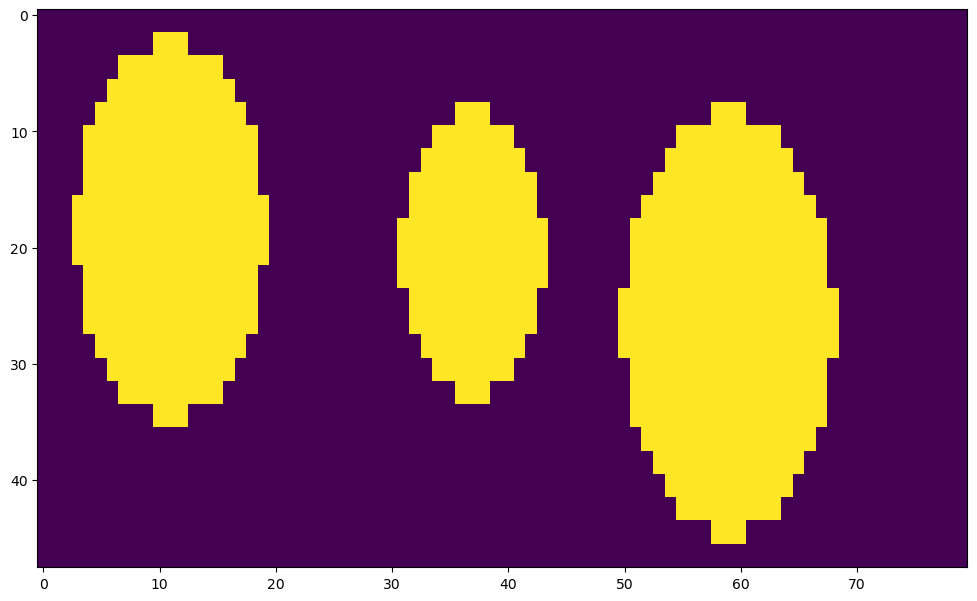

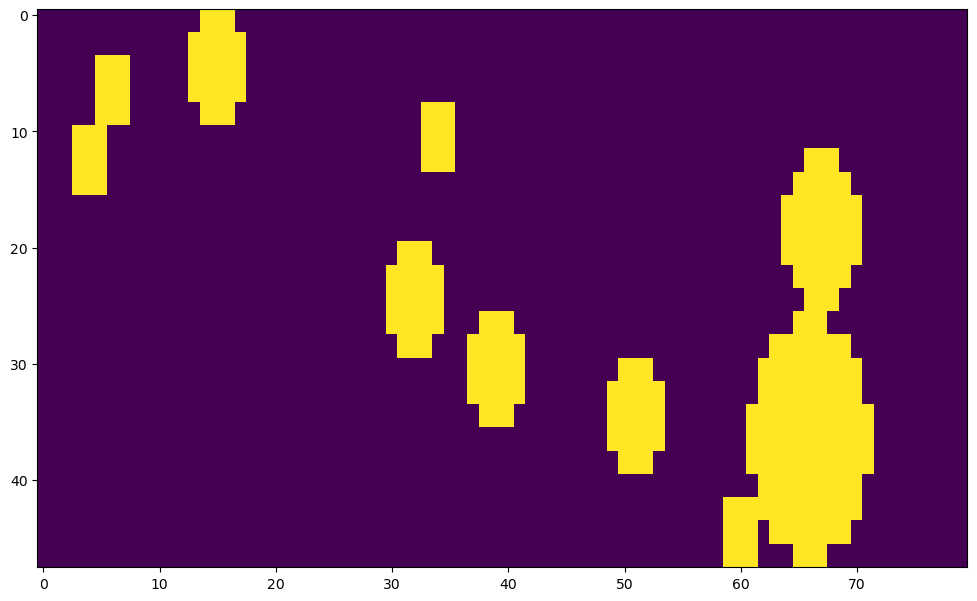

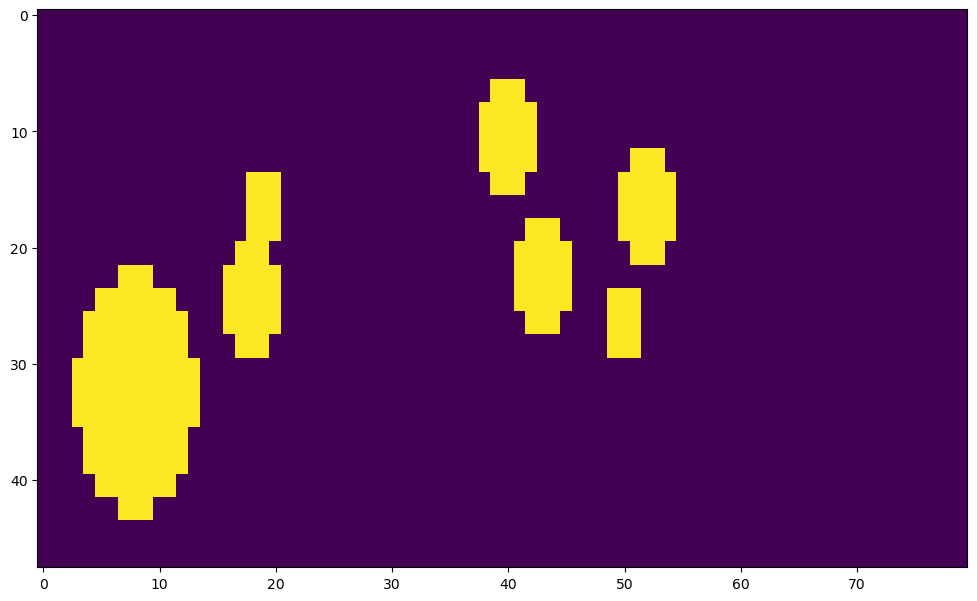

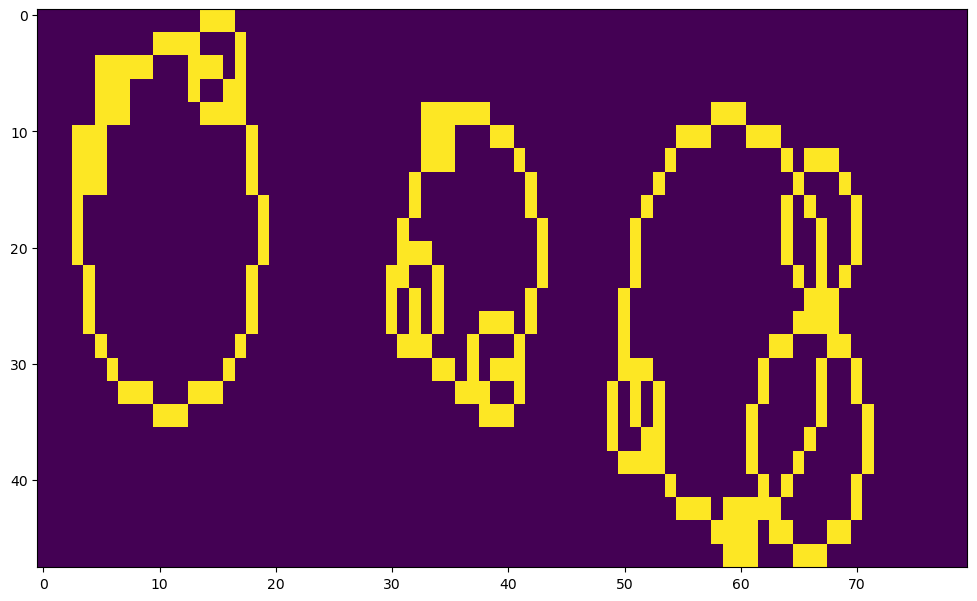

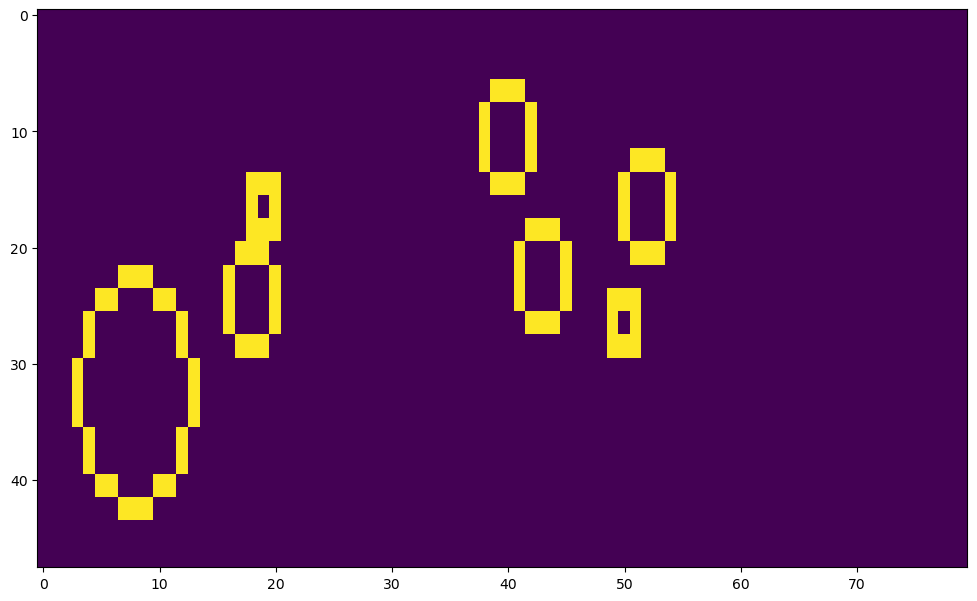

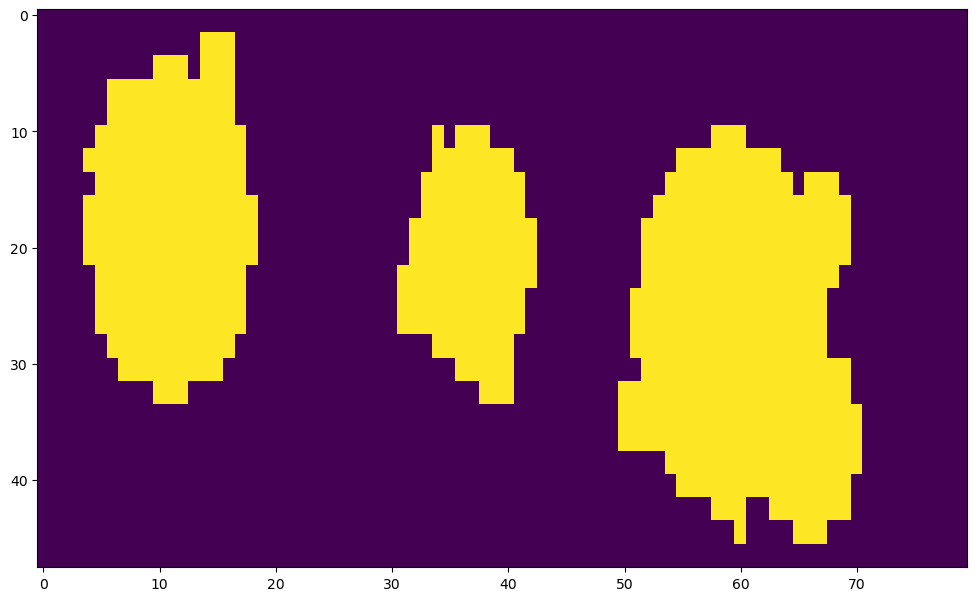

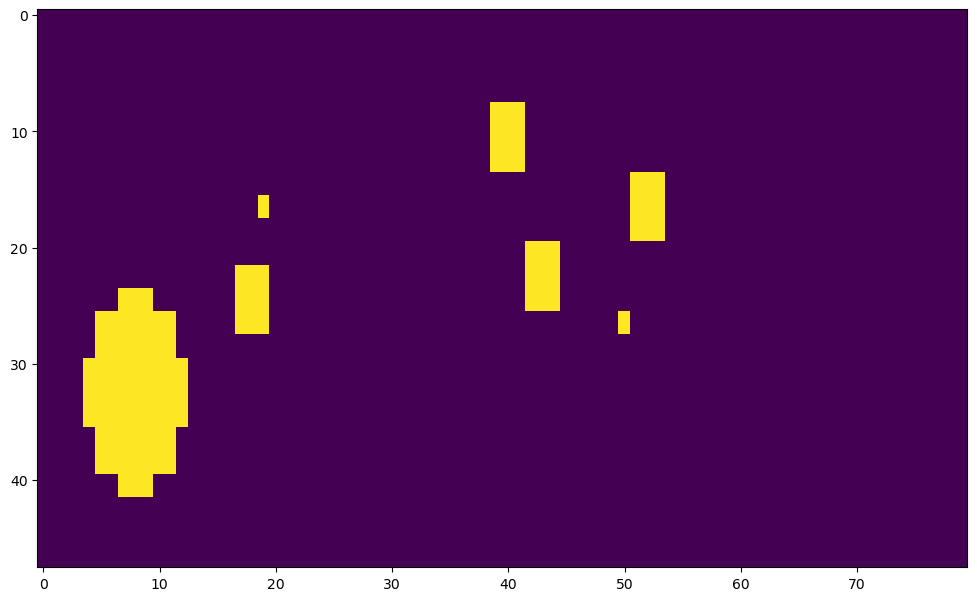

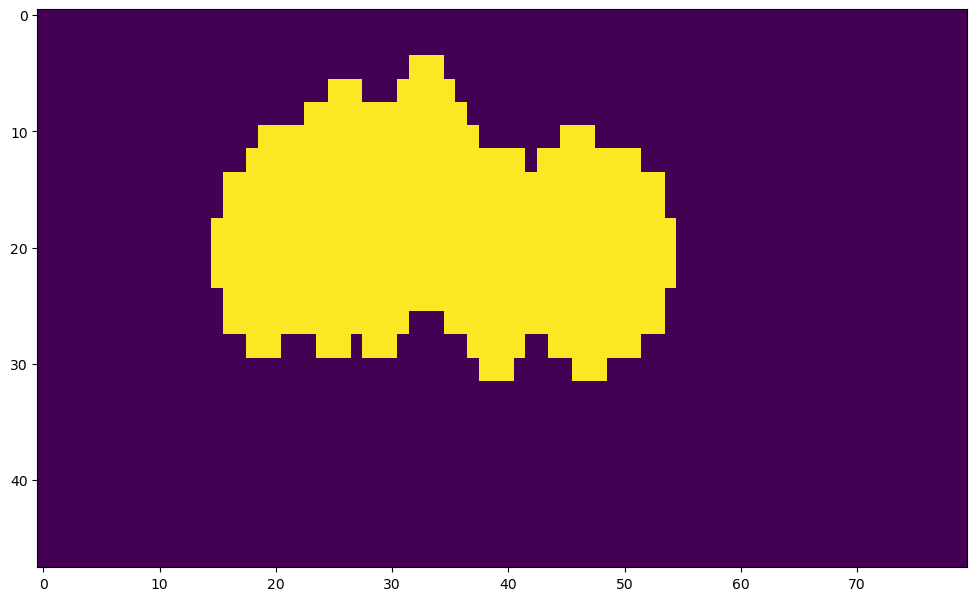

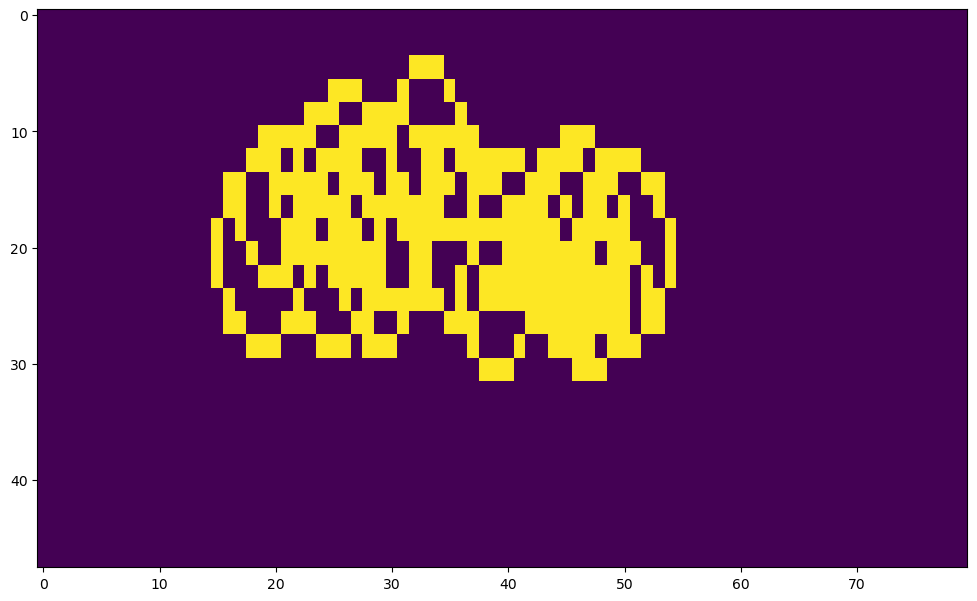

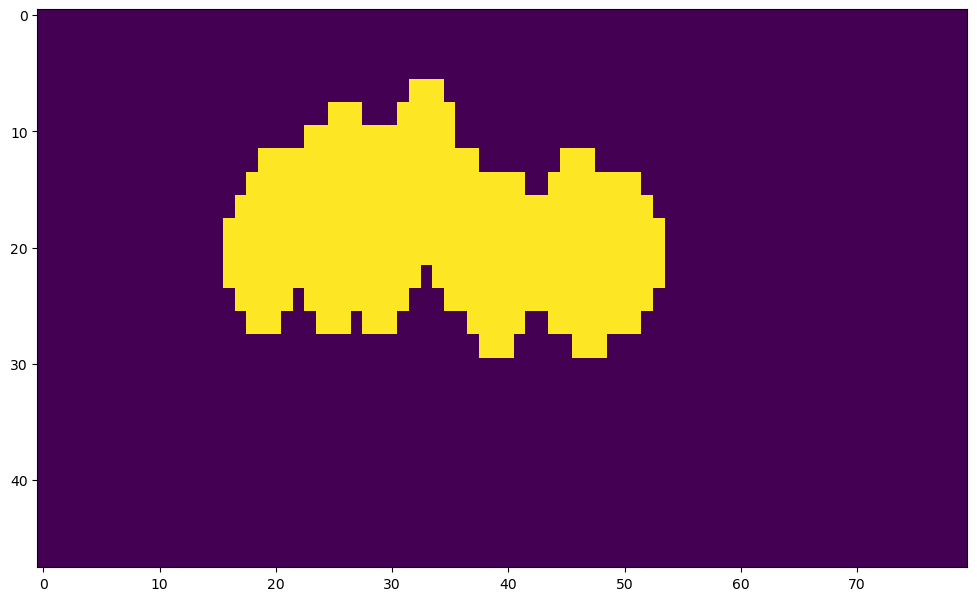

In [41]:
layers = myCave.draw("image")
for l in layers:
    plot.imshow(l.repeat(2, 0))
    plot.show()